In [1]:
import pandas as pd
import numpy as np
import seaborn as sn

In [2]:
#create a DataFrame
zips_df = pd.read_csv('zip_code_demographics.csv')

In [3]:
zips_df.head()

,zip,lat,lng,city,state_id,state_name,population,density,county_name,po_box,dist_highway,dist2_large_airport,dist2_medium_airport,dist_to_shore,number_of_business,adjusted_gross_income,total_income_amount,number_of_returns
0,1001,42.06262,-72.62521,Agawam,MA,Massachusetts,16088,550.1,Hampden,0,1.387035,106.145765,12.946212,93.049251,438.0,598807,6.047690e+05,9320
1,1002,42.37633,-72.46462,Amherst,MA,Massachusetts,27323,198.1,Hampshire,0,14.438177,112.264368,21.080079,133.370144,571.0,989558,1.005796e+06,9880
2,1005,42.42117,-72.10655,Barre,MA,Massachusetts,4947,44.2,Worcester,0,16.788339,90.664964,25.547718,97.639881,97.0,164207,1.660540e+05,2490
3,1007,42.28163,-72.40009,Belchertown,MA,Massachusetts,15304,107.7,Hampshire,0,13.663839,101.552921,14.762395,114.406034,217.0,647074,6.547390e+05,7970
4,1008,42.18234,-72.95819,Blandford,MA,Massachusetts,1171,7.4,Hampden,0,2.593655,136.548797,20.177950,107.466779,18.0,47826,4.824100e+04,660


In [4]:
zips_df.columns

Index(['zip', 'lat', 'lng', 'city', 'state_id', 'state_name', 'population',
       'density', 'county_name', 'po_box', 'dist_highway',
       'dist2_large_airport', 'dist2_medium_airport', 'dist_to_shore',
       'number_of_business', 'adjusted_gross_income', 'total_income_amount',
       'number_of_returns'],
      dtype='object')

In [18]:
#number of biz and distance to shore
biz_df = zips_df[['number_of_business','dist_to_shore']]
biz_df.head()

,number_of_business,dist_to_shore
0,438.00,93.05
1,571.00,133.37
2,97.00,97.64
3,217.00,114.41
4,18.00,107.47


In [16]:
#clean up dist_to_shore values
pd.options.display.float_format = '{:.2f}'.format
biz_df.head()


,number_of_business,dist_to_shore
0,438.00,93.05
1,571.00,133.37
2,97.00,97.64
3,217.00,114.41
4,18.00,107.47


In [21]:
#Want to make dataset smaller--finding the mean
biz_df.describe()

,number_of_business,dist_to_shore
count,33624.00,33704.00
mean,260.69,304.80
std,432.11,298.95
min,1.00,0.01
25%,19.00,61.29
50%,74.00,207.33
75%,334.00,471.86
max,7263.00,1336.55


In [26]:
#create smaller dataframe with data less than the mean
biz_to_shore = biz_df[(biz_df['dist_to_shore'] < 305) & (biz_df['number_of_business'] < 260)]
biz_to_shore.max()

number_of_business   259.00
dist_to_shore        304.87
dtype: float64

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


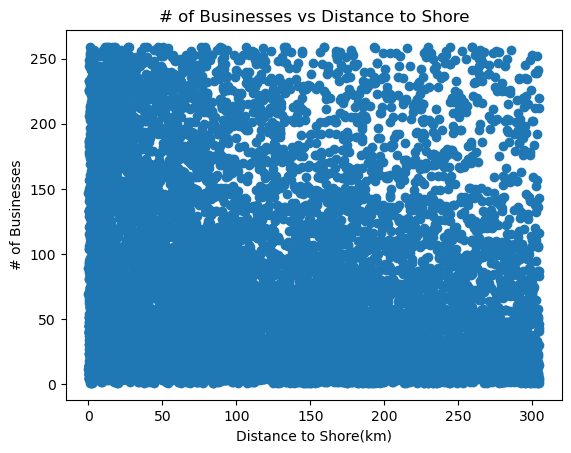

In [51]:
#scatter plot to see patterns between # of business and distance to the shore
plt.scatter(biz_to_shore['dist_to_shore'], biz_to_shore['number_of_business'])
plt.title("# of Businesses vs Distance to Shore")
plt.xlabel("Distance to Shore(km)")
plt.ylabel("# of Businesses")
plt.show()

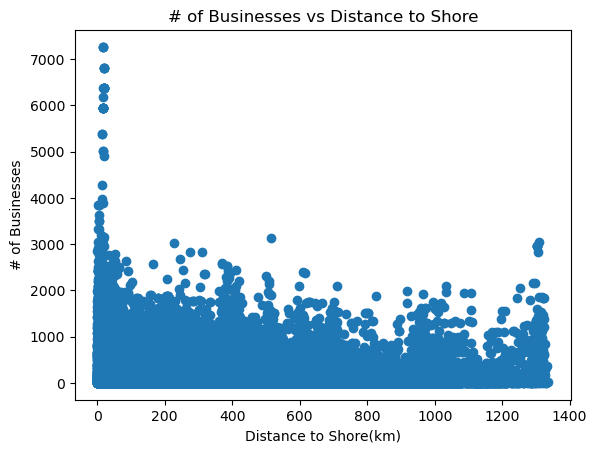

In [50]:
plt.scatter(biz_df['dist_to_shore'], biz_df['number_of_business'])
plt.title("# of Businesses vs Distance to Shore")
plt.xlabel("Distance to Shore(km)")
plt.ylabel("# of Businesses")
plt.show()

In [54]:
#Let's look at some outliers
#grabbing the data
outliercity_df = pd.read_csv('zip_code_demographics.csv')

In [55]:
outliercity_df.columns

Index(['zip', 'lat', 'lng', 'city', 'state_id', 'state_name', 'population',
       'density', 'county_name', 'po_box', 'dist_highway',
       'dist2_large_airport', 'dist2_medium_airport', 'dist_to_shore',
       'number_of_business', 'adjusted_gross_income', 'total_income_amount',
       'number_of_returns'],
      dtype='object')

In [58]:
#getting the columns
outliers_df = outliercity_df[['city','number_of_business','dist_to_shore']]
outliers_df.head()

,city,number_of_business,dist_to_shore
0,Agawam,438.00,93.05
1,Amherst,571.00,133.37
2,Barre,97.00,97.64
3,Belchertown,217.00,114.41
4,Blandford,18.00,107.47


In [59]:
#create smaller dataframe with data less than the mean
outliers_df2 = outliers_df[(biz_df['number_of_business'] > 4000)]
outliers_df2.head(20)

,city,number_of_business,dist_to_shore
2188,New York,7263.00,17.01
2190,New York,4271.00,14.92
2199,New York,5379.00,13.57
2201,New York,5940.00,17.42
2202,New York,5018.00,17.68
2203,New York,6801.00,18.34
2204,New York,4899.00,19.48
2206,New York,6378.00,18.69
2220,New York,6176.00,18.30
27896,New York,6801.00,18.55
